In [109]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import time

In [110]:
L = 256
dx = 0.1
dt = 0.3
tspan = 1000
nloops = int(tspan/dt)

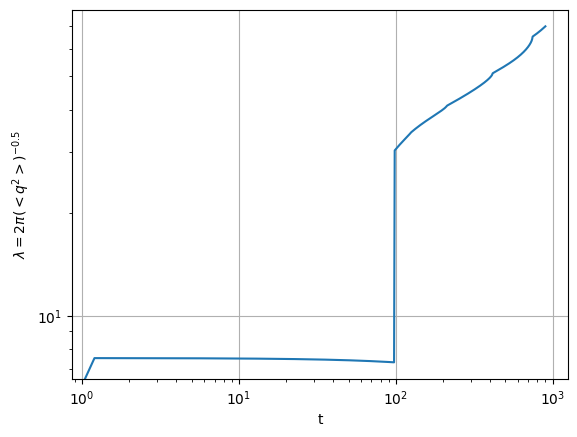

In [111]:
f = open("../fileQ2.dat", "r")
N = int(L/dx)
tt = np.zeros(nloops)
q2 = np.zeros(nloops)
lam = np.zeros(nloops)
i = 0
for row in f:
    if i != 0:
        a, b = row.split(" ")
        tt[i] = float(a)
        q2[i] = float(b)
        lam[i] = 2*np.pi/np.sqrt(q2[i])

    i = i + 1

tmax = i
#tmax = int(1000/dt)
tt = tt[0:tmax-1]
q2 = q2[0:tmax-1]
lam = lam[0:tmax-1]

plt.loglog(tt, lam)
plt.xlabel("t")
plt.ylabel("$\lambda = 2\pi (<q^2>)^{-0.5}$")
plt.grid()

In [112]:
tt

array([  0. ,   1.2,   2.1,   3. ,   3.9,   4.8,   5.7,   6.6,   7.5,
         8.4,   9.3,  10.2,  11.1,  12. ,  12.9,  13.8,  14.7,  15.6,
        16.5,  17.4,  18.3,  19.2,  20.1,  21. ,  21.9,  22.8,  23.7,
        24.6,  25.5,  26.4,  27.3,  28.2,  29.1,  30. ,  30.9,  31.8,
        32.7,  33.6,  34.5,  35.4,  36.3,  37.2,  38.1,  39. ,  39.9,
        40.8,  41.7,  42.6,  43.5,  44.4,  45.3,  46.2,  47.1,  48. ,
        48.9,  49.8,  50.7,  51.6,  52.5,  53.4,  54.3,  55.2,  56.1,
        57. ,  57.9,  58.8,  59.7,  60.6,  61.5,  62.4,  63.3,  64.2,
        65.1,  66. ,  66.9,  67.8,  68.7,  69.6,  70.5,  71.4,  72.3,
        73.2,  74.1,  75. ,  75.9,  76.8,  77.7,  78.6,  79.5,  80.4,
        81.3,  82.2,  83.1,  84. ,  84.9,  85.8,  86.7,  87.6,  88.5,
        89.4,  90.3,  91.2,  92.1,  93. ,  93.9,  94.8,  95.7,  96.6,
        97.5,  98.4,  99.3, 100.2, 101.1, 102. , 102.9, 103.8, 104.7,
       105.6, 106.5, 107.4, 108.3, 109.2, 110.1, 111. , 111.9, 112.8,
       113.7, 114.6,

Text(0, 0.5, '$\\int |\\nabla u|^2 dx$')

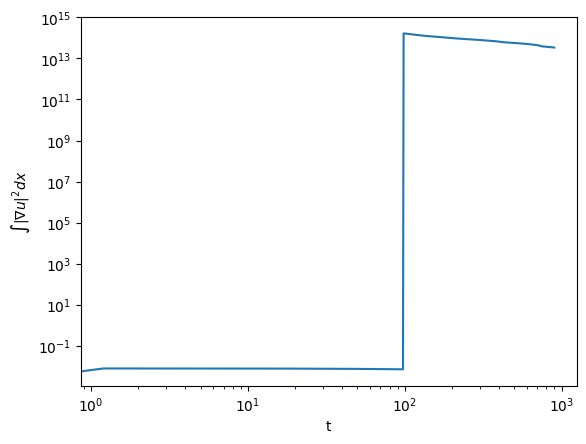

In [113]:
f = open("../fileGrad2.dat", "r")
tt = np.zeros(nloops)
grad2 = np.zeros(nloops)
i = 0
for row in f:
    if i != 0:
        a, b = row.split(" ")
        tt[i] = float(a)
        grad2[i] = float(b)

    i = i + 1

tt = tt[0:i-1]
grad2 = grad2[0:i-1]

plt.loglog(tt, grad2)
plt.xlabel("t")
plt.ylabel("$\int |\\nabla u|^2 dx$")

Text(0, 0.5, '$\\int u dx$')

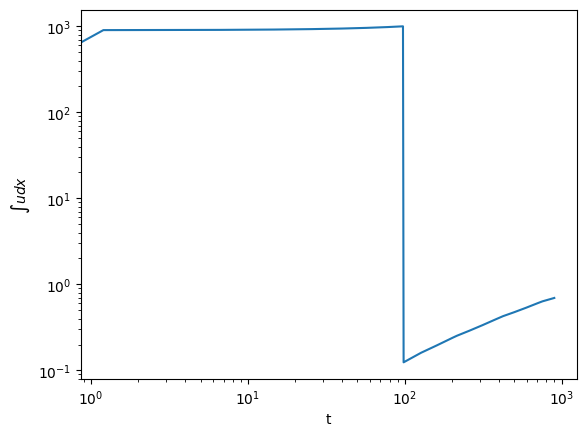

In [116]:
f = open("../fileAveout.dat", "r")
tt = np.zeros(nloops)
ave = np.zeros(nloops)
i = 0
for row in f:
    if i != 0:
        a, b = row.split(" ")
        tt[i] = float(a)
        ave[i] = float(b)

    i = i + 1

tt = tt[0:i-1]
ave = ave[0:i-1]

plt.loglog(tt, ave)
plt.xlabel("t")
plt.ylabel("$\int u dx$")

In [115]:
grad2

array([0.00000000e+00, 8.01822096e-03, 8.01129239e-03, 8.00436419e-03,
       7.99743633e-03, 7.99050882e-03, 7.98358165e-03, 7.97665481e-03,
       7.96972828e-03, 7.96280206e-03, 7.95587614e-03, 7.94895051e-03,
       7.94202516e-03, 7.93510008e-03, 7.92817527e-03, 7.92125071e-03,
       7.91432640e-03, 7.90740232e-03, 7.90047848e-03, 7.89355485e-03,
       7.88663143e-03, 7.87970821e-03, 7.87278518e-03, 7.86586233e-03,
       7.85893965e-03, 7.85201714e-03, 7.84509479e-03, 7.83817257e-03,
       7.83125050e-03, 7.82432855e-03, 7.81740672e-03, 7.81048499e-03,
       7.80356337e-03, 7.79664183e-03, 7.78972037e-03, 7.78279899e-03,
       7.77587767e-03, 7.76895639e-03, 7.76203516e-03, 7.75511397e-03,
       7.74819279e-03, 7.74127164e-03, 7.73435048e-03, 7.72742932e-03,
       7.72050815e-03, 7.71358695e-03, 7.70666572e-03, 7.69974444e-03,
       7.69282311e-03, 7.68590172e-03, 7.67898026e-03, 7.67205872e-03,
       7.66513708e-03, 7.65821534e-03, 7.65129349e-03, 7.64437152e-03,
      